# PD8 Wstęp do Machine Learning - praca domowa

Na podstawie notebooka python, przeanalizuj zbiór danych german credit data i stwórz dla niego model klasyfikacyjny za pomocą drzewa decyzyjnego w dwóch postaciach:

1. Na podstawie zmiennych wystandaryzowanych
2. Na podstawie wyników analizy głównych składowych.


"do pracy domowej ze wstępu / drzew decyzyjnych wkradł się błąd. W pliku z danymi nie było targetu. Wgrałem do PD_8 nowy plik german_credit_data_new.csv z targetem (kolumna class). Gdyby ktoś potrzebował większego opisu: https://datahub.io/machine-learning/credit-g#data - ciekawą kwestią jest podana macierz kosztów - co oznacza, że złe wytypowanie Bada ma inne znaczenie dla biznesu niż niepoprawne zaznaczenia Gooda - Jest to ciekawe wykorzystanie wiedzy biznesowej. Możecie zmodyfikować macierz pomyłek poprzez wagi wynikające z macierzy kosztów i zmodyfikować poziom cut-off (podobnie jak na zajęciach). Oczywiście to o czym piszę nie jest obowiązkowe. Aa i jedna moja podpowiedź: target jest niezbilansowany, więc ocena modelu jedynie przez pryzmat accuracy nie będzie poprawna."

## Zbior german credit data

biorę od razu german credit data new

### Wczytanie pakietów

In [377]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns",101)
plt.rcParams["figure.figsize"] = (20, 3)

### Eksploracja

#### Wczytanie zbioru danych

In [7]:
df = pd.read_csv('german_credit_data_new.csv', sep=';')

#### Przegląd danych w zbiorze
##### Metody
1. head
2. info
3. shape
4. describe
5. value_counts

In [8]:
# 1. head
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169,no known savings,>=7,4,male single,none,4,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951,<100,1<=X<4,2,female div/dep/mar,none,2,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096,<100,4<=X<7,2,male single,none,3,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882,<100,4<=X<7,2,male single,guarantor,4,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870,<100,1<=X<4,3,male single,none,4,no known property,53,none,for free,2,skilled,2,none,yes,bad


In [9]:
# 2. info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   checking_status         1000 non-null   object
 1   duration                1000 non-null   int64 
 2   credit_history          1000 non-null   object
 3   purpose                 1000 non-null   object
 4   credit_amount           1000 non-null   int64 
 5   savings_status          1000 non-null   object
 6   employment              1000 non-null   object
 7   installment_commitment  1000 non-null   int64 
 8   personal_status         1000 non-null   object
 9   other_parties           1000 non-null   object
 10  residence_since         1000 non-null   int64 
 11  property_magnitude      1000 non-null   object
 12  age                     1000 non-null   int64 
 13  other_payment_plans     1000 non-null   object
 14  housing                 1000 non-null   object
 15  exist

In [10]:
# 3. shape
df.shape

(1000, 21)

In [11]:
# 4. describe
df.describe()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [20]:
# 5. value_counts
# wypisze tylko dla targetu
df["class"].value_counts()

good    700
bad     300
Name: class, dtype: int64

#### Sprawdzenie udziału poszczególnych kategorii - zadanie samodzielne


In [21]:
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [28]:
for i in df.columns:
    print(i,":", len(set(df[i])))
    print(set(df[i]))
    print()

checking_status : 4
{'no checking', '0<=X<200', '<0', '>=200'}

duration : 33
{4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 20, 21, 22, 24, 26, 27, 28, 30, 33, 36, 39, 40, 42, 45, 47, 48, 54, 60, 72}

credit_history : 5
{'existing paid', 'critical/other existing credit', 'all paid', 'delayed previously', 'no credits/all paid'}

purpose : 10
{'new car', 'other', 'furniture/equipment', 'business', 'education', 'repairs', 'used car', 'retraining', 'radio/tv', 'domestic appliance'}

credit_amount : 921
{2051, 6148, 2058, 4110, 2063, 2064, 4113, 2069, 2073, 2080, 8229, 6187, 4139, 2096, 2100, 2101, 4151, 6199, 4153, 10297, 6204, 2108, 2116, 4165, 2118, 2121, 4169, 2122, 2124, 6224, 2132, 6229, 2134, 14421, 2136, 2133, 2141, 2142, 2145, 2146, 2149, 2150, 12389, 4210, 6260, 2169, 2171, 4221, 8318, 10366, 2181, 2186, 8335, 6288, 4241, 6289, 2197, 4249, 6304, 2210, 2212, 2214, 8358, 6313, 6314, 2221, 2223, 4272, 2225, 4280, 4281, 6331, 2235, 2238, 2241, 8386, 2246, 2247, 2249, 4297, 2251, 

### Wykresy
1. Pudełko
2. Histogram

Wstawię przykładowe wykresy dla niektórych zmiennych.

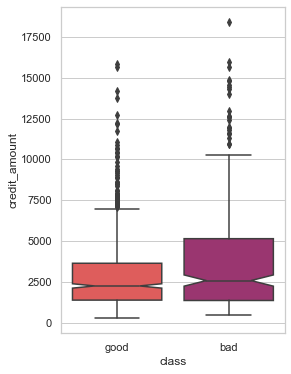

In [37]:
plt.figure(figsize=(4, 6))
sns.set_theme(style="whitegrid")
g = sns.boxplot(x='class',
                y='credit_amount',
                data=df,
                notch=True,
                palette='flare',
                saturation=5)

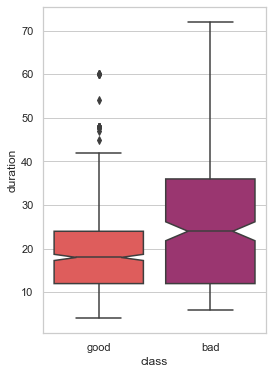

In [36]:
plt.figure(figsize=(4, 6))
sns.set_theme(style="whitegrid")
g = sns.boxplot(x='class',
                y='duration',
                data=df,
                notch=True,
                palette='flare',
                saturation=5)

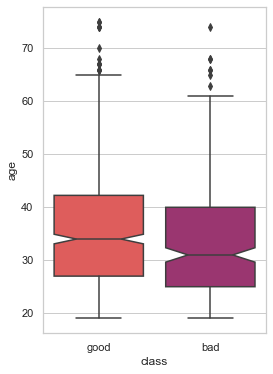

In [38]:
plt.figure(figsize=(4, 6))
sns.set_theme(style="whitegrid")
g = sns.boxplot(x='class',
                y='age',
                data=df,
                notch=True,
                palette='flare',
                saturation=5)

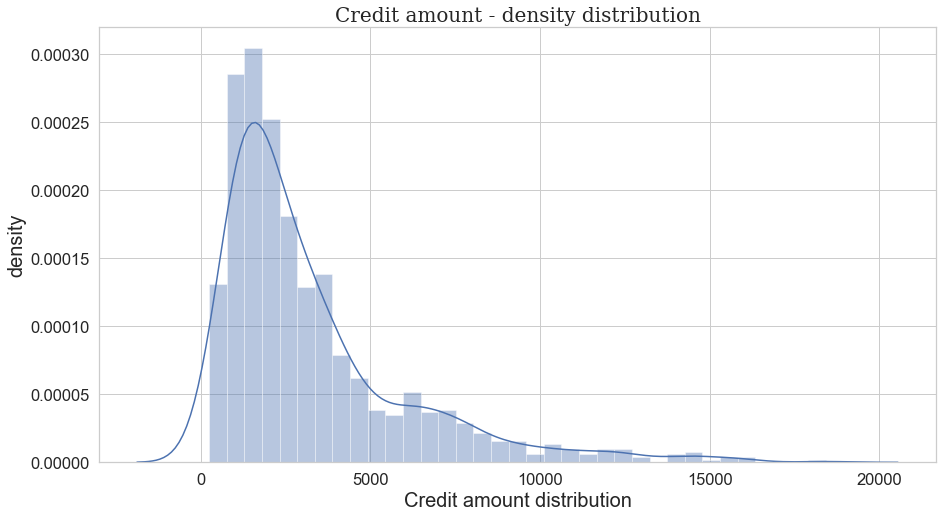

In [41]:
plt.figure(figsize=(15, 8))
sns.set_theme(style="whitegrid", font_scale=1.5)
sns.color_palette("Blues")
ax = sns.distplot(df["credit_amount"], norm_hist=True)
ax.set_xlabel("Credit amount distribution", fontsize=20)
ax.set_ylabel("density", fontsize=20)
plt.title("Credit amount - density distribution", fontsize=20, fontfamily='serif')
pass

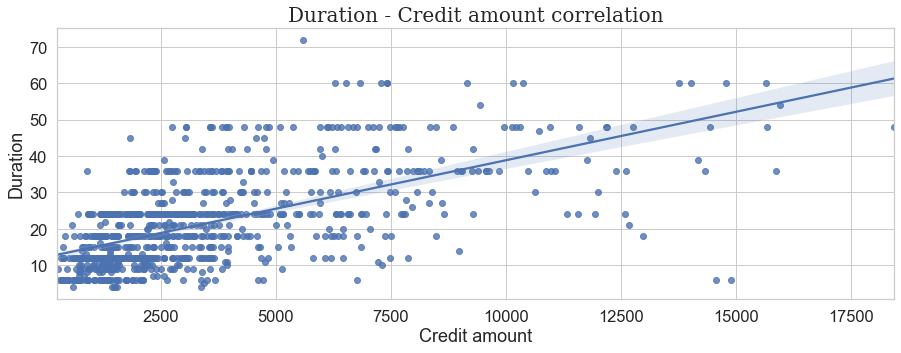

In [40]:
plt.figure(figsize = (15,5))
ax = sns.regplot(x="credit_amount", y="duration" , data=df)
plt.xlabel("Credit amount")
plt.ylabel("Duration")
plt.title("Duration - Credit amount correlation", fontsize = 20, fontfamily = 'serif')
pass

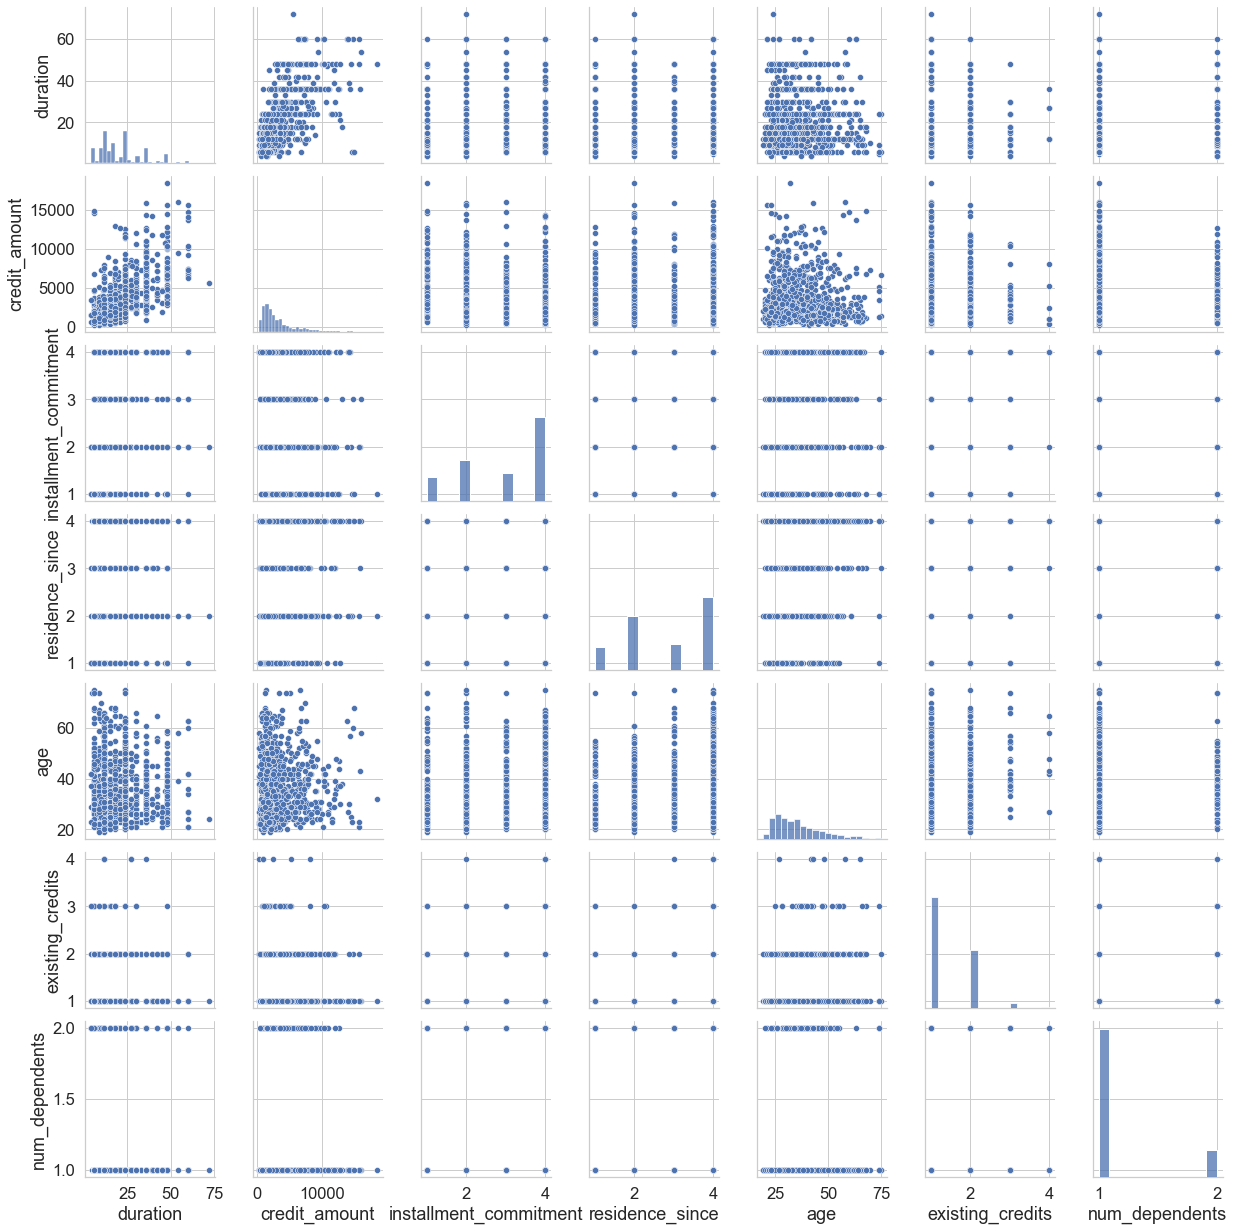

In [43]:
sns.pairplot(df)
pass

#### Sprawdzenie braków danych

In [60]:
print((df.isna().sum()) == 0)
print()
print((df.isna().sum()) == df.isnull().sum())

checking_status           True
duration                  True
credit_history            True
purpose                   True
credit_amount             True
savings_status            True
employment                True
installment_commitment    True
personal_status           True
other_parties             True
residence_since           True
property_magnitude        True
age                       True
other_payment_plans       True
housing                   True
existing_credits          True
job                       True
num_dependents            True
own_telephone             True
foreign_worker            True
class                     True
dtype: bool

checking_status           True
duration                  True
credit_history            True
purpose                   True
credit_amount             True
savings_status            True
employment                True
installment_commitment    True
personal_status           True
other_parties             True
residence_since           

#### Korelacja

In [61]:
correlation_matrix = np.round(df.corr(), 3)

In [62]:
print (correlation_matrix)

                        duration  credit_amount  installment_commitment  \
duration                   1.000          0.625                   0.075   
credit_amount              0.625          1.000                  -0.271   
installment_commitment     0.075         -0.271                   1.000   
residence_since            0.034          0.029                   0.049   
age                       -0.036          0.033                   0.058   
existing_credits          -0.011          0.021                   0.022   
num_dependents            -0.024          0.017                  -0.071   

                        residence_since    age  existing_credits  \
duration                          0.034 -0.036            -0.011   
credit_amount                     0.029  0.033             0.021   
installment_commitment            0.049  0.058             0.022   
residence_since                   1.000  0.266             0.090   
age                               0.266  1.000             

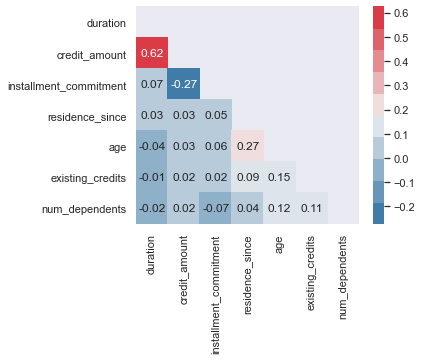

In [67]:
sns.set(rc={'figure.figsize': (5, 4)})
color_map = sns.diverging_palette(240, 10, n=10)
mask = np.triu(np.ones_like(correlation_matrix), k=0)
sns.heatmap(correlation_matrix,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap=color_map,
            vmin=-0.272,
            vmax=0.626)
pass

In [71]:
le = LabelEncoder()

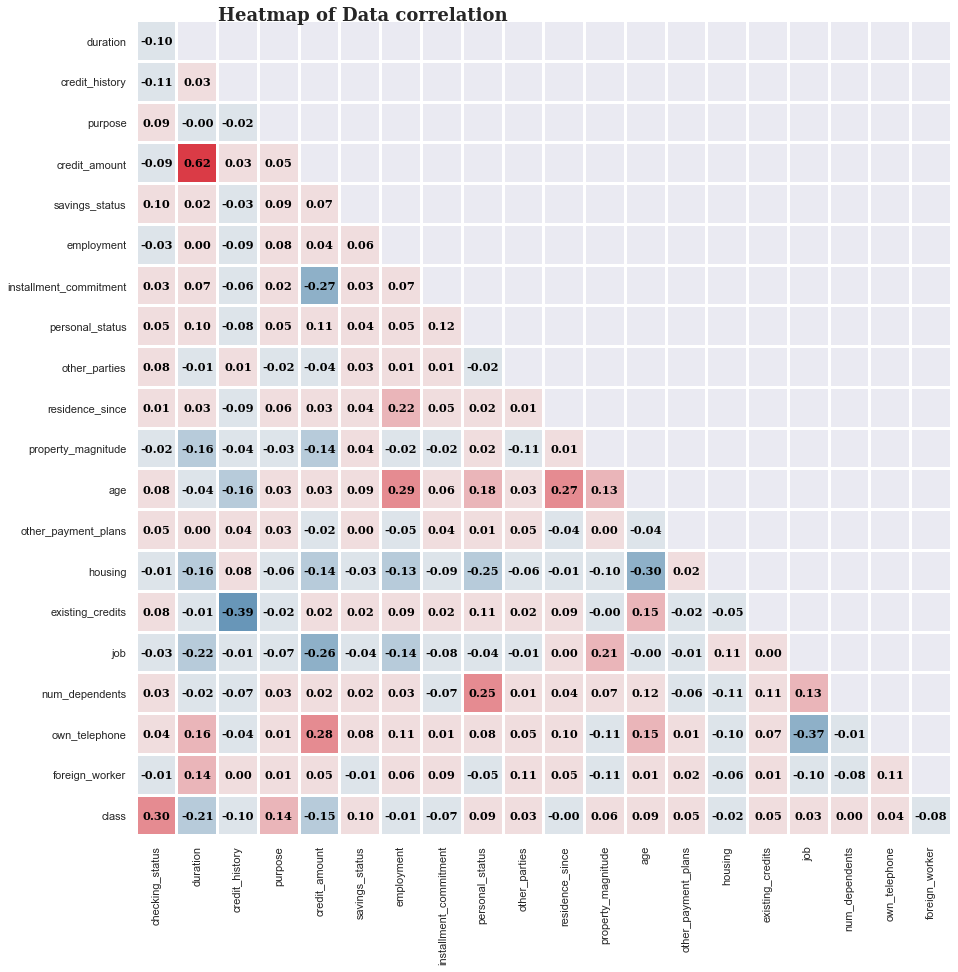

In [74]:
plt.figure(figsize=(15, 15))
df_copy1 = df.copy()
objList = df_copy1.select_dtypes(include="object").columns
for col in objList:
    df_copy1[col] = le.fit_transform(df_copy1[col].astype(str))
df_corr = df_copy1.corr()
color_map = sns.diverging_palette(240, 10, n=10)
mask = np.triu(np.ones_like(df_corr), k=0)
mask = mask[1:, :-1]
corr = df_corr.iloc[1:, :-1].copy()
sns.heatmap(corr,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap=color_map,
            center=0,
            vmin=-0.389,
            vmax=.625,
            cbar=False,
            linewidth=2,
            square=True,
            annot_kws={
                'font': 'serif',
                'size': 11.5,
                'color': 'black',
                'fontweight': 'bold'
            })
plt.text(2,
         0,
         'Heatmap of Data correlation',
         fontsize=18,
         fontweight='bold',
         fontfamily='serif')
pass

In [75]:
cx = np.round(df_copy1.corr(), 3)
cx

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
checking_status,1.000,-0.096,-0.111,0.091,-0.093,0.097,-0.030,0.030,0.049,0.084,0.009,-0.020,0.084,0.052,-0.013,0.085,-0.029,0.030,0.037,-0.015,0.302
duration,-0.096,1.000,0.029,-0.002,0.625,0.021,0.004,0.075,0.100,-0.007,0.034,-0.163,-0.036,0.004,-0.157,-0.011,-0.215,-0.024,0.165,0.138,-0.215
credit_history,-0.111,0.029,1.000,-0.021,0.029,-0.032,-0.088,-0.060,-0.080,0.011,-0.087,-0.040,-0.157,0.040,0.084,-0.388,-0.014,-0.070,-0.039,0.001,-0.097
purpose,0.091,-0.002,-0.021,1.000,0.052,0.085,0.080,0.016,0.053,-0.021,0.063,-0.026,0.033,0.027,-0.063,-0.023,-0.072,0.025,0.013,0.009,0.138
credit_amount,-0.093,0.625,0.029,0.052,1.000,0.070,0.039,-0.271,0.115,-0.038,0.029,-0.140,0.033,-0.020,-0.136,0.021,-0.261,0.017,0.277,0.050,-0.155
savings_status,0.097,0.021,-0.032,0.085,0.070,1.000,0.057,0.033,0.035,0.031,0.039,0.041,0.095,0.001,-0.033,0.016,-0.041,0.024,0.076,-0.013,0.103
employment,-0.030,0.004,-0.088,0.080,0.039,0.057,1.000,0.075,0.049,0.007,0.219,-0.023,0.290,-0.052,-0.127,0.085,-0.142,0.028,0.111,0.065,-0.009
installment_commitment,0.030,0.075,-0.060,0.016,-0.271,0.033,0.075,1.000,0.118,0.015,0.049,-0.019,0.058,0.041,-0.089,0.022,-0.078,-0.071,0.014,0.090,-0.072
personal_status,0.049,0.100,-0.080,0.053,0.115,0.035,0.049,0.118,1.000,-0.022,0.020,0.015,0.177,0.007,-0.246,0.112,-0.040,0.254,0.079,-0.049,0.090
other_parties,0.084,-0.007,0.011,-0.021,-0.038,0.031,0.007,0.015,-0.022,1.000,0.013,-0.108,0.028,0.052,-0.061,0.018,-0.015,0.011,0.051,0.108,0.028


zmienne najsilniej skorelowane z targetem:

In [86]:
cor_ranking = df.corr()['class'].sort_values(ascending = False)
cor_ranking_abs = abs(cor_ranking)
cor_ranking_abs.sort_values(ascending = False)

class                     1.000000
checking_status           0.302406
duration                  0.214927
credit_amount             0.154739
purpose                   0.138152
savings_status            0.103133
credit_history            0.097054
age                       0.091127
personal_status           0.089535
foreign_worker            0.082079
installment_commitment    0.072404
property_magnitude        0.055529
other_payment_plans       0.053862
existing_credits          0.045732
own_telephone             0.036466
job                       0.032756
other_parties             0.028441
housing                   0.019315
employment                0.008932
num_dependents            0.003015
residence_since           0.002967
Name: class, dtype: float64

### Feature Engineering
#### Stworzenie zmiennych 0-1 dla kategorii lub labelencodera
Użycie funkcji z pandas get_dummies() lub labelencoder()

In [87]:
objList = df.select_dtypes(include = "object").columns
le = LabelEncoder()
for col in objList:
    df[col] = le.fit_transform(df[col].astype(str))

In [88]:
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,1,6,1,6,1169,4,3,4,3,2,4,3,67,1,1,2,1,1,1,1,1
1,0,48,3,6,5951,2,0,2,0,2,2,3,22,1,1,1,1,1,0,1,0
2,3,12,1,2,2096,2,1,2,3,2,3,3,49,1,1,1,3,2,0,1,1
3,1,42,3,3,7882,2,1,2,3,1,4,1,45,1,0,1,1,2,0,1,1
4,1,24,2,4,4870,2,0,3,3,2,4,2,53,1,0,2,1,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,12,3,3,1736,2,1,3,0,2,4,3,31,1,1,1,3,1,0,1,1
996,1,30,3,9,3857,2,0,4,1,2,4,1,40,1,1,1,0,1,1,1,1
997,3,12,3,6,804,2,3,4,3,2,4,0,38,1,1,1,1,1,0,1,1
998,1,45,3,6,1845,2,0,4,3,2,4,2,23,1,0,1,1,1,1,1,0


#### Wytypowanie zmiennych na podstawie korelacji i analizy zmiennych 0-1

In [89]:
X = df.drop(columns = ['class'])
y = df['class']

### Przygotowanie zbioru
#### Podział zbioru na treningowy i testowy

In [333]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [143]:
print(len(X_train))
print(len(X_test))

700
300


In [ ]:
X_train

#### Standaryzacja

In [145]:
my_scaler = StandardScaler()

In [146]:
X_train = my_scaler.fit_transform(X_train)
X_test = my_scaler.fit_transform(X_test)

In [147]:
[my_scaler.mean_, my_scaler.var_]

[array([1.52666667e+00, 2.13033333e+01, 2.23666667e+00, 4.56000000e+00,
        3.32147667e+03, 2.20000000e+00, 1.64333333e+00, 2.96333333e+00,
        1.95000000e+00, 1.85333333e+00, 2.90000000e+00, 1.42666667e+00,
        3.61300000e+01, 9.06666667e-01, 1.07333333e+00, 1.39666667e+00,
        1.24333333e+00, 1.16000000e+00, 3.86666667e-01, 9.60000000e-01]),
 array([1.59595556e+00, 1.53951322e+02, 1.10065556e+00, 5.80640000e+00,
        7.93864118e+06, 1.36000000e+00, 2.03612222e+00, 1.23532222e+00,
        1.80083333e+00, 2.25155556e-01, 1.23000000e+00, 1.53128889e+00,
        1.43539767e+02, 1.57955556e-01, 2.74622222e-01, 3.32655556e-01,
        8.70788889e-01, 1.34400000e-01, 2.37155556e-01, 3.84000000e-02])]

In [ ]:
X_train

#### Analiza głównych składowych

In [149]:
pca = PCA().fit(X_train)

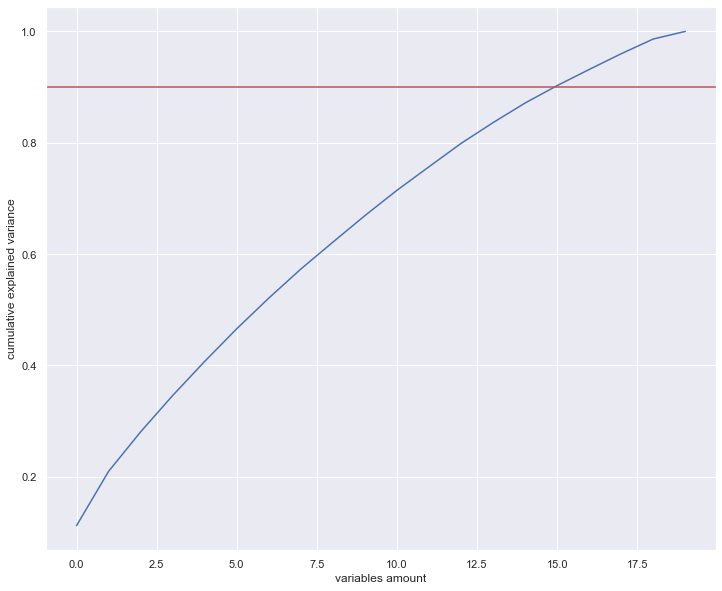

In [150]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('variables amount')
plt.ylabel('cumulative explained variance')
plt.axhline(y=0.9, color='r', linestyle='-')
plt.gcf().set_size_inches(12, 10)
pass

In [151]:
number_var = (np.cumsum(pca.explained_variance_ratio_) < 0.9)

nv = 0
for i in number_var:
    if i == True:
        nv += 1
nv

15

15 zmiennych tłumaczy 90% danych. Ustawiam liczbę zmiennych (komponentów) na 15.

In [152]:
print(np.round(pca.explained_variance_ratio_,3))

[0.112 0.097 0.071 0.065 0.061 0.059 0.055 0.052 0.048 0.048 0.045 0.042
 0.042 0.037 0.035 0.031 0.029 0.028 0.026 0.014]


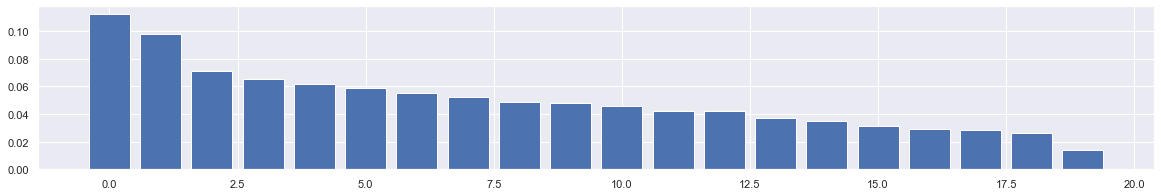

In [153]:
plt.bar(range(pca.n_components_),pca.explained_variance_ratio_)
pass

In [174]:
n_pca_comp=nv
X_pca_train = pca.fit_transform(X_train)[:, :n_pca_comp]
X_pca_test = pca.transform(X_test)[:, :n_pca_comp]

In [166]:
print((len(X_train)) == (len(y_train)) == (len(X_pca_train)))
print((len(X_test)) == (len(y_test)) == (len(X_pca_test)))

True
True


### Estymacja modelu klasyfikacyjnego

In [208]:
clf1 = DecisionTreeClassifier(random_state=50)
clf1 = clf1.fit(X_train,y_train)
y_pred1 = clf1.predict(X_test)

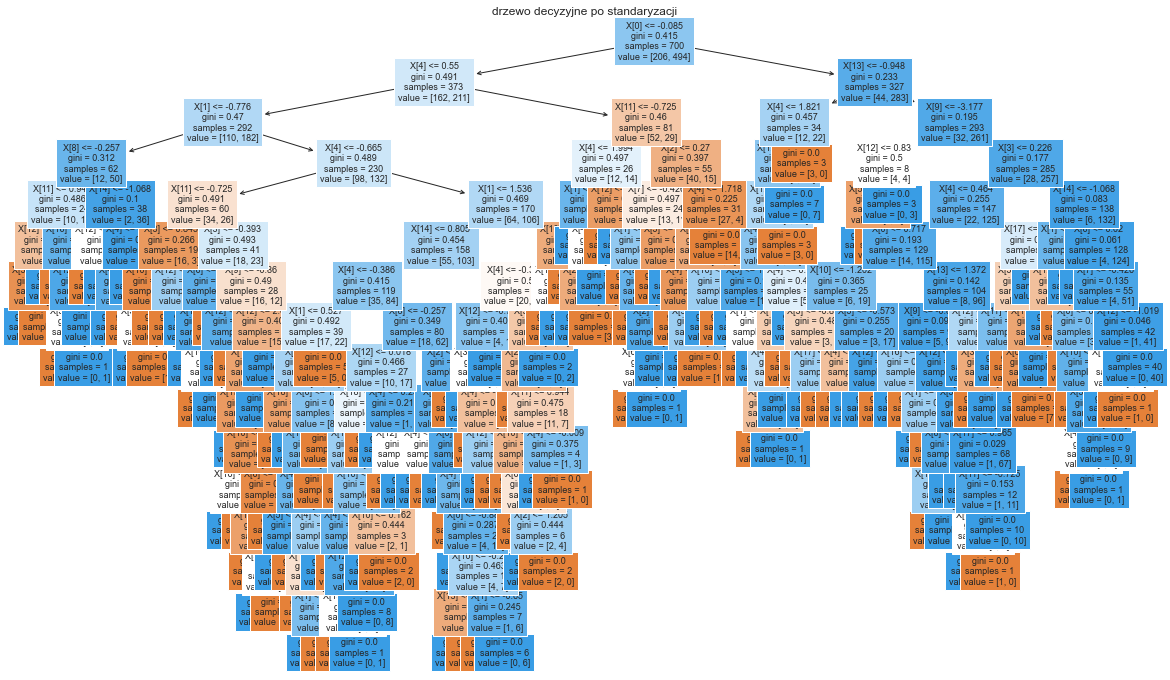

In [209]:
plt.figure(figsize=(20, 12))
plot_tree(clf1, fontsize=9, filled=True)
plt.title("drzewo decyzyjne po standaryzacji")
plt.show()
pass

In [210]:
clf2 = DecisionTreeClassifier(random_state=50)
clf2 = clf2.fit(X_pca_train,y_train)
y_pred2 = clf2.predict(X_pca_test)

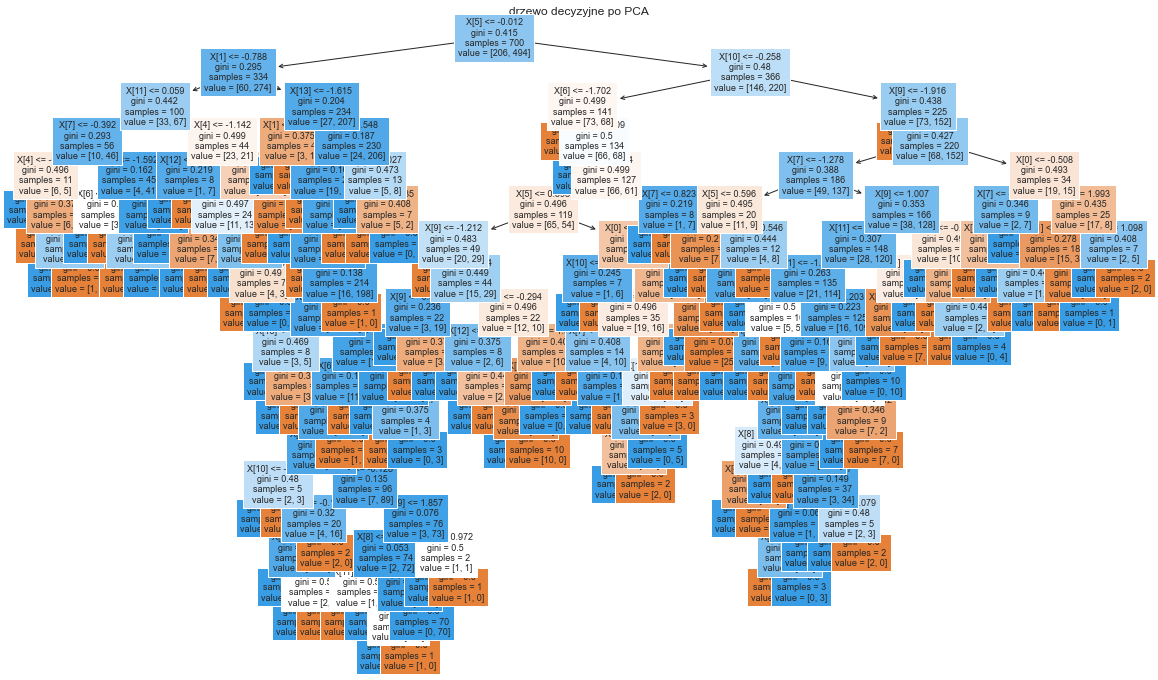

In [211]:
plt.figure(figsize=(20,12)) 
plot_tree(clf2,fontsize=9, filled = True)
plt.title("drzewo decyzyjne po PCA")
plt.show()
pass

### Ocena jakości modelu klasyfikacyjnego

#### 1 po zmiennych standaryzowanych

In [212]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[ 47  47]
 [ 60 146]]
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        94
           1       0.76      0.71      0.73       206

    accuracy                           0.64       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.66      0.64      0.65       300



#### 2 po PCA

In [213]:
print(confusion_matrix(y_test, y_pred2))
print(classification_report(y_test, y_pred2))

[[ 44  50]
 [ 60 146]]
              precision    recall  f1-score   support

           0       0.42      0.47      0.44        94
           1       0.74      0.71      0.73       206

    accuracy                           0.63       300
   macro avg       0.58      0.59      0.59       300
weighted avg       0.64      0.63      0.64       300



#### wnioski po PD8':
Zbiór ma 700 Good i 300 Bad więc samo Accuracy nie jest do końca odpowiednią miara oceny modelu, bo lepiej odwzorowuje efektywność modelu z targetem typu "50/50".
Będę się do niej odwoływał ale przyjmuję, że dla mnie podstawowym odniesieniem będzie f-1 score, który jest kombinacją (śr. harmoniczną) wszystkich elementów z macierzy pomyłek. 

Accuracy w obu przypadkach po zmiennych wystandaryzowanych i po PCA jest zbliżone, podobnie ocena parametrem F1.
Modele są bardzo zbliżone, nieznacznie lepszy jest po zmiennych wystandaryzowanych.

# Praca domowa nr 10

Zadanie polega na rozszerzeniu zadania domowego nr 8 (tzn. po wstępie do ML)
1. Zmodyfikuj wyestymowany model dodając do niego hiperparametry.
2. Zoptymalizuj wybrany przez siebie hiperparametr np. za pomocą estymacji wariantów modeli w pętli. 
3. Wytypuj najbardziej informatywne zmienne i stwórz dla nich model regresji logistycznej.
4. Porównaj jakość 3 modeli: drzewa decyzyjnego, drzewa decyzyjnego dla zoptymalizowanych parametrów oraz regresji logistycznej.
5. Jakość modeli wyznacz za pomocą przynajmniej dwóch cech (w tym jedną z nich powinien być krzywą roc lub auc)
6. Wybierz najlepszy model. Wynik uzasadnij.

Zadanie dodatkowe:
Stwórz model drzewa decyzyjnego regresyjnego na podstawie zbioru danych Boston (szacowanie ceny mieszkań) dostępnego w materiałach z zajęć o drzewach decyzyjnych.
Oceń model zgodnie z obowiązującymi zasadami. Użyj hiperparametrów. 

### 1. Modyfikacja wyestymowanego modelu dodając do niego hiperparametry.

Będę opierał się na modelu po zmiennych standaryzowanych.

Wypiszę jeszcze raz wyniki z hiperparametrami domyślnymi:

In [220]:
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))

[[ 47  47]
 [ 60 146]]
              precision    recall  f1-score   support

           0       0.44      0.50      0.47        94
           1       0.76      0.71      0.73       206

    accuracy                           0.64       300
   macro avg       0.60      0.60      0.60       300
weighted avg       0.66      0.64      0.65       300



teraz ręcznie mu pozmieniam to i owo:

In [221]:
clf3 = DecisionTreeClassifier(max_depth=8,
                              min_samples_leaf=50,
                              max_features="sqrt",
                              random_state=50)
clf3 = clf3.fit(X_train, y_train)
y_pred3 = clf3.predict(X_test)

In [222]:
print(confusion_matrix(y_test, y_pred3))
print(classification_report(y_test, y_pred3))

[[ 19  75]
 [ 46 160]]
              precision    recall  f1-score   support

           0       0.29      0.20      0.24        94
           1       0.68      0.78      0.73       206

    accuracy                           0.60       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.56      0.60      0.57       300



Nie narobiłem za dużo dobrego. Spadło Acc i precyzja. Recall nieco lepszy; 

Trzeba to jakoś dostroić.

### 2. Optymalizacja wybranego przez siebie hiperparametru np. za pomocą estymacji wariantów modeli w pętli. 

będę mu optymalizował głębokość drzewa

In [223]:
maks_depth = np.arange(2, 10 + 1)

for i in maks_depth:
    clf4 = DecisionTreeClassifier(max_depth=i,
                                  min_samples_leaf=50,
                                  max_features="sqrt",
                                  random_state=50).fit(X_train, y_train)
    y_score4 = clf4.predict_proba(X_test)[:, 1]
    y_pred4 = clf4.predict(X_test)
    print("Report for tree depth = ", i)
    print(confusion_matrix(y_test, y_pred4))
    print(classification_report(y_test, y_pred4))
    print("\n")

Report for tree depth =  2
[[  8  86]
 [ 30 176]]
              precision    recall  f1-score   support

           0       0.21      0.09      0.12        94
           1       0.67      0.85      0.75       206

    accuracy                           0.61       300
   macro avg       0.44      0.47      0.44       300
weighted avg       0.53      0.61      0.55       300



Report for tree depth =  3
[[ 19  75]
 [ 46 160]]
              precision    recall  f1-score   support

           0       0.29      0.20      0.24        94
           1       0.68      0.78      0.73       206

    accuracy                           0.60       300
   macro avg       0.49      0.49      0.48       300
weighted avg       0.56      0.60      0.57       300



Report for tree depth =  4
[[  8  86]
 [ 30 176]]
              precision    recall  f1-score   support

           0       0.21      0.09      0.12        94
           1       0.67      0.85      0.75       206

    accuracy                

Najlepsze paarmetry są dla głębokości drzewa max_depth = 4.

Zobię mu jeszcze grid search żeby poszukać minimalną ilość liści:

In [224]:
clf5 = DecisionTreeClassifier(criterion='gini',
                              max_depth=8,
                              min_samples_leaf=50,
                              max_features="sqrt",
                              random_state=50)

random_search = GridSearchCV(clf5, {
    'max_depth': range(2, 10 + 1),
    'min_samples_leaf': range(10, 100, 10),
},
                             cv=5,
                             verbose=1)
random_search.fit(X_train, y_train)
random_search.best_params_

Fitting 5 folds for each of 81 candidates, totalling 405 fits


{'max_depth': 2, 'min_samples_leaf': 10}

porównam więc oba wyniki:
1) max_depth=4, min_samples_leaf=50

In [226]:
clf6 = DecisionTreeClassifier(max_depth=4,
                              min_samples_leaf=50,
                              max_features="sqrt",
                              random_state=50).fit(X_train, y_train)
y_score6 = clf6.predict_proba(X_test)[:, 1]
y_pred6 = clf6.predict(X_test)
print(confusion_matrix(y_test, y_pred6))
print(classification_report(y_test, y_pred6))

[[  8  86]
 [ 30 176]]
              precision    recall  f1-score   support

           0       0.21      0.09      0.12        94
           1       0.67      0.85      0.75       206

    accuracy                           0.61       300
   macro avg       0.44      0.47      0.44       300
weighted avg       0.53      0.61      0.55       300



2) max_depth=4, min_samples_leaf=30

In [227]:
clf7 = DecisionTreeClassifier(max_depth=2,
                              min_samples_leaf=30,
                              max_features="sqrt",
                              random_state=50).fit(X_train, y_train)
y_score7 = clf7.predict_proba(X_test)[:, 1]
y_pred7 = clf7.predict(X_test)
print(confusion_matrix(y_test, y_pred7))
print(classification_report(y_test, y_pred7))

[[ 16  78]
 [ 22 184]]
              precision    recall  f1-score   support

           0       0.42      0.17      0.24        94
           1       0.70      0.89      0.79       206

    accuracy                           0.67       300
   macro avg       0.56      0.53      0.51       300
weighted avg       0.61      0.67      0.62       300



Istotnie zmiana jest spora. Wyptoltuję to.

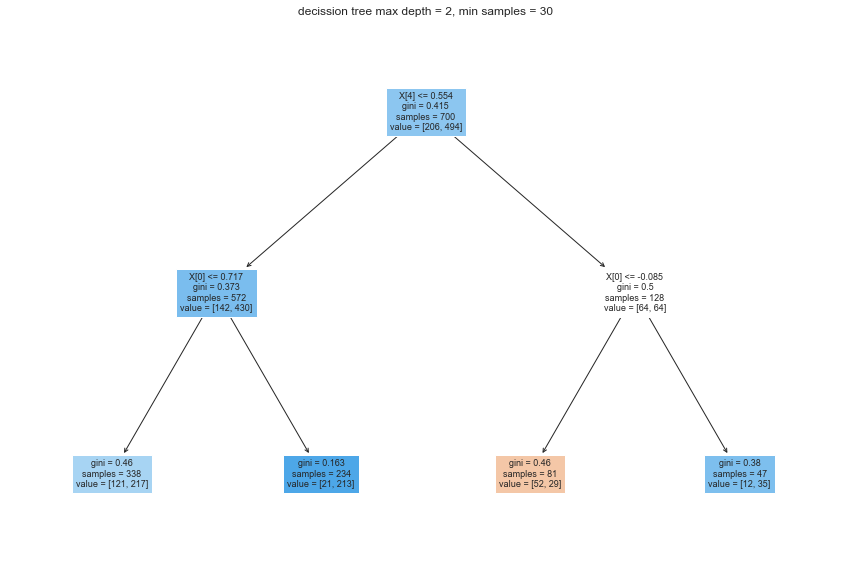

In [232]:
plt.figure(figsize=(15,10)) 
plot_tree(clf7,fontsize=9, filled = True)
plt.title("decission tree max depth = 2, min samples = 30")
plt.show()
pass

### 3. Wytypowanie najbardziej informatywnych zmiennych i stworzenie dla nich modelu regresji logistycznej.

zmienne nie są silnie skorelowane, można rozpatrywać wszystkie

In [309]:
important_variables = clf1.feature_importances_

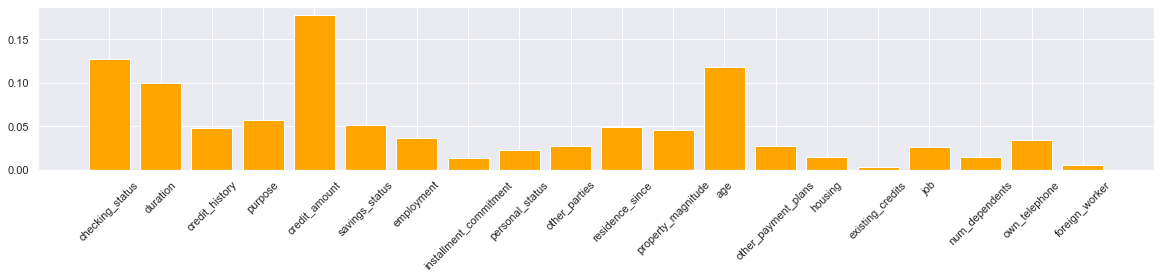

In [310]:
variables = df.columns[0:-1]
plt.bar(x=variables, height=important_variables, color="orange")
plt.xticks(rotation=45)
pass

wytypowane informatywne zmienne:

In [276]:
dfinfo = df[['checking_status', 'duration', 'credit_amount', 'age']]

In [334]:
Xinfo = dfinfo
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xinfo, y,test_size=0.3, random_state=50) 

In [335]:
clf8 = LogisticRegression(random_state=50)
clf8.fit(Xi_train, yi_train)

LogisticRegression(random_state=50)

In [338]:
yi_pred8 = clf8.predict(Xi_test)

In [339]:
print(confusion_matrix(yi_test, yi_pred8))
print(classification_report(yi_test, yi_pred8))

[[ 21  72]
 [ 12 195]]
              precision    recall  f1-score   support

           0       0.64      0.23      0.33        93
           1       0.73      0.94      0.82       207

    accuracy                           0.72       300
   macro avg       0.68      0.58      0.58       300
weighted avg       0.70      0.72      0.67       300



### 4. Porównnie jakości 3 modeli: drzewa decyzyjnego, drzewa decyzyjnego dla zoptymalizowanych parametrów oraz regresji logistycznej.

In [340]:
print("własności modelu drzewa decyzyjnego")
print(confusion_matrix(y_test, y_pred1))
print(classification_report(y_test, y_pred1))
print()
print("własności modelu drzewa decyzyjnego zoptymalizowanego")
print(confusion_matrix(y_test, y_pred7))
print(classification_report(y_test, y_pred7))
print()
print("własności modelu regresji logistycznej")
print(confusion_matrix(yi_test, yi_pred8))
print(classification_report(yi_test, yi_pred8))

własności modelu drzewa decyzyjnego
[[ 33  60]
 [ 74 133]]
              precision    recall  f1-score   support

           0       0.31      0.35      0.33        93
           1       0.69      0.64      0.67       207

    accuracy                           0.55       300
   macro avg       0.50      0.50      0.50       300
weighted avg       0.57      0.55      0.56       300


własności modelu drzewa decyzyjnego zoptymalizowanego
[[ 12  81]
 [ 26 181]]
              precision    recall  f1-score   support

           0       0.32      0.13      0.18        93
           1       0.69      0.87      0.77       207

    accuracy                           0.64       300
   macro avg       0.50      0.50      0.48       300
weighted avg       0.57      0.64      0.59       300


własności modelu regresji logistycznej
[[ 21  72]
 [ 12 195]]
              precision    recall  f1-score   support

           0       0.64      0.23      0.33        93
           1       0.73      0.94    

dla przyjętej metody oceny:
1) na pierszym miejscu F1-score,

2) na drugim miejscu Accuracy,

3) na trzecim miejscu recall:

regresja logistyczna daje najlepsze wyniki w każdym z nich więc jednoznacznie wygrywa jako predyktor.

### 5. Wyznaczenie jakości modeli  za pomocą przynajmniej dwóch cech (w tym jedną z nich powinien być krzywą roc lub auc)

nie rozpatrywałem wcześneij krzywej ROC lub AUC. Zrobię to teras.

In [348]:
print("własności modelu drzewa decyzyjnego")
print("AUC:      ", roc_auc_score(y_test, y_pred1))
print("F1-score: ", f1_score(y_test, y_pred1))
print("Recall:   ", recall_score(y_test, y_pred1))

własności modelu drzewa decyzyjnego
AUC:       0.4986753934860527
F1-score:  0.665
Recall:    0.642512077294686


In [349]:
print("własności modelu drzewa decyzyjnego zoptymalizowanego")
print("AUC:      ", roc_auc_score(y_test, y_pred7))
print("F1-score: ", f1_score(y_test, y_pred7))
print("Recall:   ", recall_score(y_test, y_pred7))

własności modelu drzewa decyzyjnego zoptymalizowanego
AUC:       0.5017141966651083
F1-score:  0.7718550106609807
Recall:    0.8743961352657005


In [350]:
print("własności modelu regresji logistycznej")
print("AUC:      ", roc_auc_score(yi_test, yi_pred8))
print("F1-score: ", f1_score(yi_test, yi_pred8))
print("Recall:   ", recall_score(yi_test, yi_pred8))

własności modelu regresji logistycznej
AUC:       0.5839177185600748
F1-score:  0.8227848101265822
Recall:    0.9420289855072463


### 6. Wybranie najlepszego modelu, uzasadnienie wyniku.

AUC bliskie 0.5 wskazuje na to, że ogólnie wszystkie te modele nie są zbyt dobre; oznacza to dużą losowość w przypisywaniu kategorii. Spośród nich regresja logistyczna wydaje się najlepszym modelem, jednak np. jeśli zależałoby nam na modelu sprawdzającym się w określaniu TrueNegative - drzewo decyzyjne działa nieco lepiej.

Dalsze kroki w ulepszaniu modelu mogłyby polegać na rozszerzaniu ilości parametrów optymalizowanych lub zakresu wartośći tych parametrów. Należy też zwrócić uwagę, że z łapy odrzuciłem część zmiennych, co także miało wpływ na wynik.

### Zadanie dodatkowe: Stwórz model drzewa decyzyjnego regresyjnego na podstawie zbioru danych Boston (szacowanie ceny mieszkań) dostępnego w materiałach z zajęć o drzewach decyzyjnych. Oceń model zgodnie z obowiązującymi zasadami. Użyj hiperparametrów.

In [351]:
df1 = pd.read_csv("Boston.csv")

In [352]:
df1

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [353]:
df1 = df1.drop("Unnamed: 0", axis=1)

In [356]:
df1.shape

(506, 14)

In [357]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


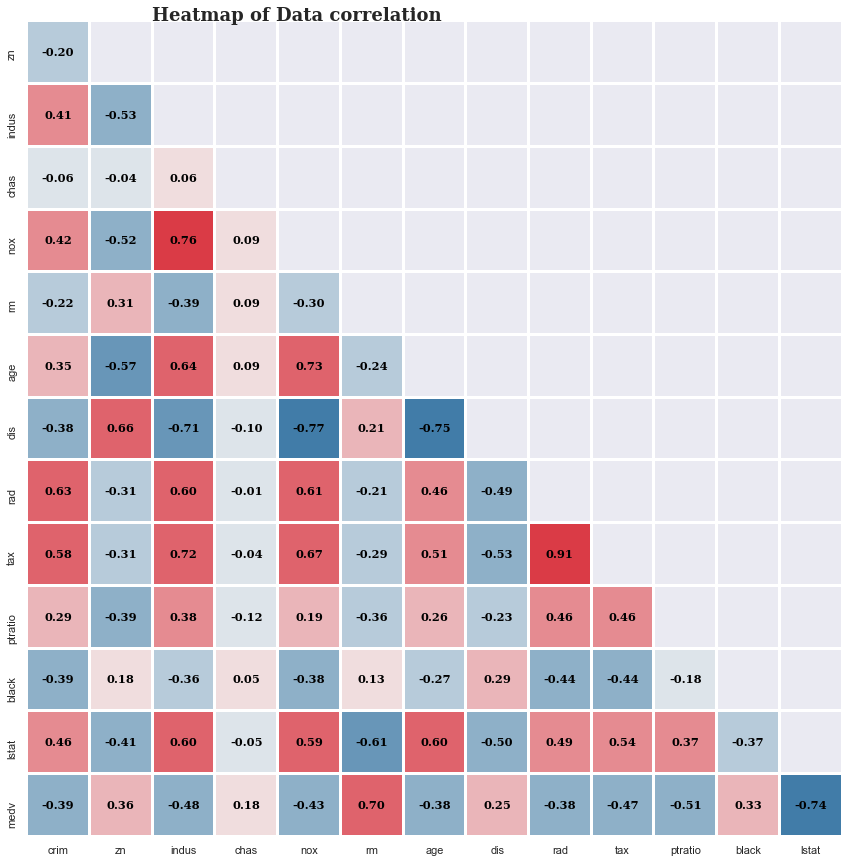

In [365]:
plt.figure(figsize=(15, 15))
df1_copy = df1.copy()
objList = df1_copy.select_dtypes(include="object").columns
for col in objList:
    df1_copy[col] = le.fit_transform(df1_copy[col].astype(str))
df_corr1 = df1_copy.corr()
color_map = sns.diverging_palette(240, 10, n=10)
mask = np.triu(np.ones_like(df_corr1), k=0)
mask = mask[1:, :-1]
corr = df_corr1.iloc[1:, :-1].copy()
sns.heatmap(corr,
            mask=mask,
            annot=True,
            fmt=".2f",
            cmap=color_map,
            center=0,
            vmin=-0.78,
            vmax=0.92,
            cbar=False,
            linewidth=2,
            square=True,
            annot_kws={
                'font': 'serif',
                'size': 11.5,
                'color': 'black',
                'fontweight': 'bold'
            })
plt.text(2,
         0,
         'Heatmap of Data correlation',
         fontsize=18,
         fontweight='bold',
         fontfamily='serif')
pass

jakoś bardziej wolę zwykłe wypisanie z posortowaniem:

In [366]:
cor_ranking1 = df1.corr()['medv'].sort_values(ascending = False)
cor_ranking_abs1 = abs(cor_ranking1)
cor_ranking_abs1.sort_values(ascending = False)

medv       1.000000
lstat      0.737663
rm         0.695360
ptratio    0.507787
indus      0.483725
tax        0.468536
nox        0.427321
crim       0.388305
rad        0.381626
age        0.376955
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
Name: medv, dtype: float64

tak jak ostatnio podczas pracy nad tym datasetem, targetem będzie medv

In [360]:
Xd = df1.drop(columns=['medv'])
yd = df1['medv']

In [361]:
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd,
                                                        yd,
                                                        test_size=0.3,
                                                        random_state=50)

wykonam jeden model z parametrami domyślnymi a drugi ze zoptymalizowanymi parametrami

do oceny użyję MAE i R^2

In [386]:
clf9 = DecisionTreeRegressor(random_state=50)
clf9.fit(Xd_train, yd_train)

DecisionTreeRegressor(random_state=50)

In [387]:
pred_train_9 = clf9.predict(Xd_train)
pred_test_9 = clf9.predict(Xd_test)

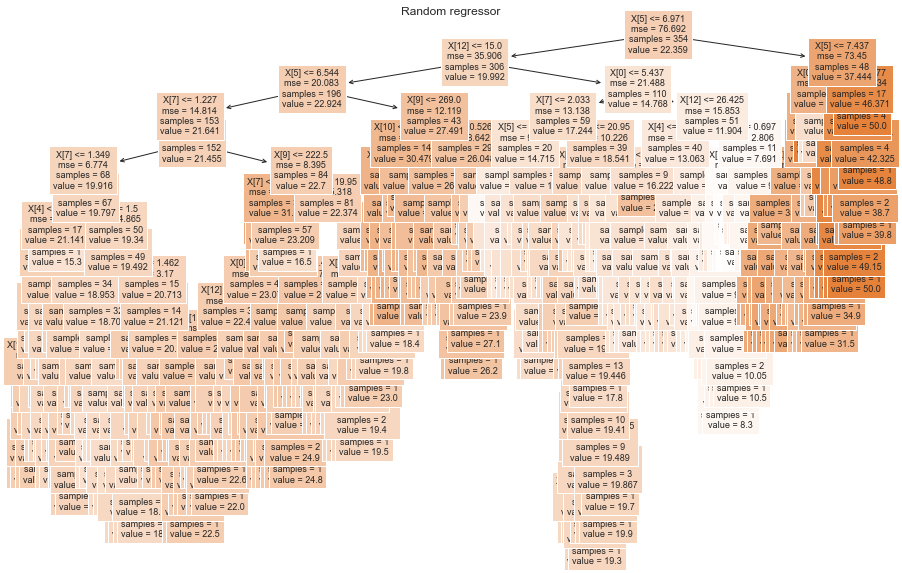

In [374]:
plt.figure(figsize=(15,10)) 
plot_tree(clf9,fontsize=9, filled = True)
plt.title("Random regressor")
plt.show()
pass

In [398]:
print("Regresor domyślny:")
print("MAE dla zbioru treningowego: ",
      mean_absolute_error(yd_train, pred_train_9))
print("MAE dla zbioru testowego   : ",
      mean_absolute_error(yd_test, pred_test_9))
print("R2 dla zbioru treningowego : ",
      r2_score(yd_train, pred_train_9))
print("R2 dla zbioru testowego    : ",
      r2_score(yd_test, pred_test_9))

Regresor domyślny:
MAE dla zbioru treningowego:  0.0
MAE dla zbioru testowego   :  3.1335526315789477
R2 dla zbioru treningowego :  1.0
R2 dla zbioru testowego    :  0.7359082069585674


zoptymalizuję go przez random searcher

In [389]:
param_grid = {"max_depth": [3,4,5,6,7,8, None],
              "max_features": list(range(2,8)),
              "min_samples_leaf": [5,10,15],
             }

In [390]:
random_search = RandomizedSearchCV(clf9,
                                   param_distributions=param_grid,
                                   cv=5,
                                   n_iter=10,
                                   verbose=1,
                                   scoring='neg_mean_absolute_error',
                                   random_state=50)
random_search.fit(Xd_train, yd_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=50),
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, None],
                                        'max_features': [2, 3, 4, 5, 6, 7],
                                        'min_samples_leaf': [5, 10, 15]},
                   random_state=50, scoring='neg_mean_absolute_error',
                   verbose=1)

In [392]:
random_search.best_params_

{'min_samples_leaf': 5, 'max_features': 7, 'max_depth': 7}

podstawienie:

In [393]:
clf10 = DecisionTreeRegressor(min_samples_leaf=5,
                              max_features=7,
                              max_depth=7,
                              random_state=50)
clf10.fit(Xd_train, yd_train)

DecisionTreeRegressor(max_depth=7, max_features=7, min_samples_leaf=5,
                      random_state=50)

In [394]:
pred_train_10 = clf10.predict(Xd_train)
pred_test_10 = clf10.predict(Xd_test)

In [399]:
print("Regresor domyślny:")
print("MAE dla zbioru treningowego: ",
      mean_absolute_error(yd_train, pred_train_9))
print("MAE dla zbioru testowego   : ",
      mean_absolute_error(yd_test, pred_test_9))
print("R2 dla zbioru treningowego : ",
      r2_score(yd_train, pred_train_9))
print("R2 dla zbioru testowego    : ",
      r2_score(yd_test, pred_test_9))
print("-----------------------------------------")
print("Regresor zoptymalizowany:")
print("MAE dla zbioru treningowego: ",
      mean_absolute_error(yd_train, pred_train_10))
print("MAE dla zbioru testowego   : ",
      mean_absolute_error(yd_test, pred_test_10))
print("R2 dla zbioru treningowego : ",
      r2_score(yd_train, pred_train_10))
print("R2 dla zbioru testowego    : ",
      r2_score(yd_test, pred_test_10))

Regresor domyślny:
MAE dla zbioru treningowego:  0.0
MAE dla zbioru testowego   :  3.1335526315789477
R2 dla zbioru treningowego :  1.0
R2 dla zbioru testowego    :  0.7359082069585674
-----------------------------------------
Regresor zoptymalizowany:
MAE dla zbioru treningowego:  1.9821268047708727
MAE dla zbioru testowego   :  3.082417606516291
R2 dla zbioru treningowego :  0.8968504639015991
R2 dla zbioru testowego    :  0.7448083197265134


### wnioski
Dopasowanie (o którym mówi R2) jest znikomo większe po optymalizacji parametrów, również błąd nei zmalał jakoś wyraźnie.
Ogólnie w takim przypadku zaleciłbym dalsze próby optymalizacji np. poprzez GridSearchCV lub tak jak w zadniu powyżej - rozszerzając zakresy czy liości parametrów juz optymalizowanych.